In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial.distance as dist

In [2]:
# (a) Join the Digit Recognizer competition on Kaggle. Download the training and test data. The
# competition page describes how these files are formatted.Load the data set
train_data = pd.read_csv('train.csv').values
test_data  = pd.read_csv('test.csv').values
train_X = train_data[:,1:]
train_Y = train_data[:,0]
test_X = test_data

Label: [0]


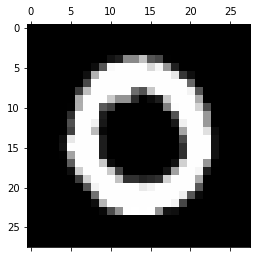

Label: [1]


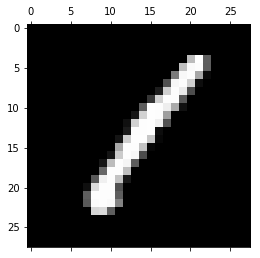

Label: [2]


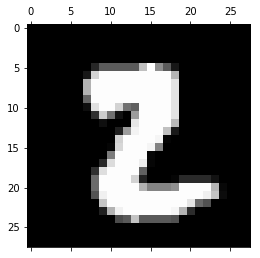

Label: [3]


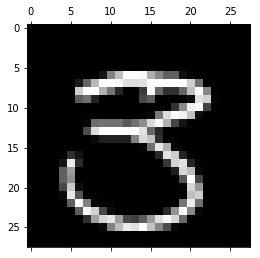

Label: [4]


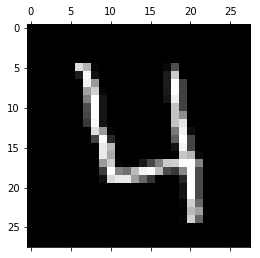

Label: [5]


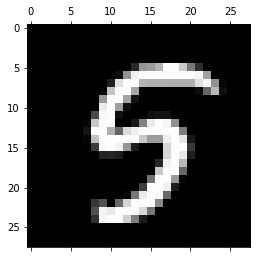

Label: [6]


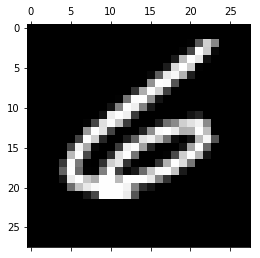

Label: [7]


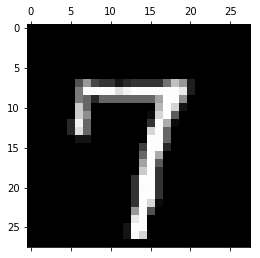

Label: [8]


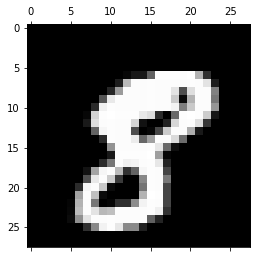

Label: [9]


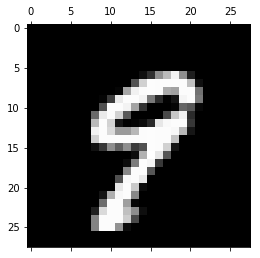

In [3]:
# (b) Write a function to display an MNIST digit. Display one of each digit.
def show_image(X,Y,n):
    print "Label:", Y[n]
    plt.matshow(X[n].reshape(28,28), cmap='gray')
    plt.show()
    
def get_digit_indexes(labels,Y,occurence):
    return [np.argwhere(Y==label)[occurence] for label in labels]

def display(labels,X,Y):
    indexes = get_digit_indexes(labels,Y,0)
    [show_image(X,Y,index) for index in indexes]

labels = range(0,10)
display(labels,train_X,train_Y)

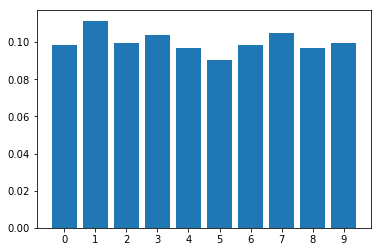

In [4]:
# (c) Examine the prior probability of the classes in the training data. Is it uniform across the
# digits? Display a normalized histogram of digit counts. Is it even?
def count(data,labels):
    return [(data == label).sum()/float(data.shape[0]) for label in labels]
frequency = count(train_Y,labels)
plt.bar(labels,frequency)
plt.xticks(labels)
plt.show()

In [5]:
# (d) Pick one example of each digit from your training data. Then, for each sample digit, compute
# and show the best match (nearest neighbor) between your chosen sample and the rest of
# the training data. Use L2 distance between the two images’ pixel values as the metric. This
# probably won’t be perfect, so add an asterisk next to the erroneous examples (if any).
def L2(a,b):
    return np.linalg.norm(a-b)

def get_distance_vector(X,index):
    return [L2(X[index,:],X[i,:]) for i in range(0,int(X.shape[0]))]

def get_nearest_vector(X,index):
    distance_vector = get_distance_vector(X,index)
    i = np.argsort(distance_vector)[1]
    #print((i,distance_vector[i]))
    return i
    
#pick the first occurance (that is index 0) for each digit and get vector matrix 
digit_indexes = get_digit_indexes(labels,train_Y,0);
output = [train_Y[get_nearest_vector(train_X,index)] for index in digit_indexes]
results = [(i,output[i]) for i in range(0,10)]
print(results)

[(0, 0), (1, 1), (2, 2), (3, 5), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


In [6]:
# (e) Consider the case of binary comparison between the digits 0 and 1. Ignoring all the other
# digits, compute the pairwise distances for all genuine matches and all impostor matches,
# again using the L2 norm. Plot histograms of the genuine and impostor distances on the same
# set of axes.
ones = train_data[np.where(train_data[:,0]==1)][:,1:]
zeroes = train_data[np.where(train_data[:,0]==0)][:,1:]
dist_one = euclidean_distances(ones,ones)
dist_zero = euclidean_distances(zeroes,zeroes)
dist_one_zero = euclidean_distances(zeroes,ones)

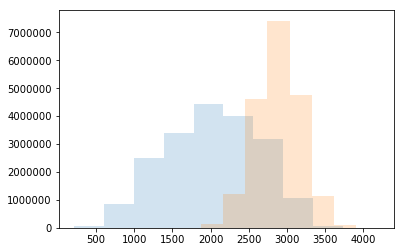

In [7]:
zero_p =np.triu(dist_zero).flatten()
zero_1 = zero_p[zero_p.nonzero()]

one_p =np.triu(dist_one).flatten()
one_1 = one_p[one_p.nonzero()]

genuine = np.append(zero_1,one_1)

zero_one = dist_one_zero.flatten()
impostor = zero_one[zero_one.nonzero()]

plt.hist(genuine,alpha=0.2,label ='genuine')
plt.hist(impostor,alpha=0.2,label ='impostor')
plt.show()

In [8]:
# (f ) Generate an ROC curve from the above sets of distances. What is the equal error rate? What
# is the error rate of a classifier that simply guesses randomly?
gen = float(len(genuine))
imp = float(len(impostor))
TP = [ len(genuine[(genuine[genuine<i]).nonzero()])/gen for i in xrange(1,4000,5)]
FP = [ len(impostor[impostor[impostor<i].nonzero()])/imp for i in xrange(1,4000,5)]


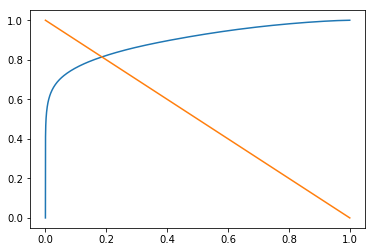

In [9]:
plt.plot(FP,TP)
X = list(np.arange(0.0, 1.1, 0.1))
y = [1-x for x in X]
plt.plot(X,y)
plt.plot()
plt.show()

In [10]:
for i in range(1,len(FP)):
    if  abs(-FP[i]+1 - TP[i]) <= 0.01:
        inter_x = FP[i]
        inter_y = TP[i]
print (inter_x,inter_y)

(0.1882980660409724, 0.8158399510373993)


In [3]:
# (g) Implement a K-NN classifier. (You cannot use external libraries for this question; it should
# be your own implementation.)

from sklearn.model_selection import KFold

#######Multi Thread Computing##############
#import multiprocessing
#
#result_list = []
# def log_result(result):
#     # This is called whenever foo_pool(i) returns a result.
#     # result_list is modified only by the main process, not the pool workers.
#     result_list.append(result)

# def get_distance_matrix_with_callback(pool,X,sample):
#     pool.apply_async(get_distance_matrix, args = (X,sample), callback = log_result)
#     pool.close()
#     pool.join()
#     print(result_list)
#     return result_list


def get_distance_matrix(X,sample):
    dists = dist.cdist(sample,X)
    return dists

def most_common(lst):
    counts = np.bincount(lst)
    return np.argmax(counts)

def knn_classify(matrix,labels,k):
    rows = [matrix[row,].argsort()[1:k+1] for row in range(len(matrix))]
    return [most_common(labels[x]) for x in rows]
    #return pool.map(most_common, labels[rows])

def compute_accuracy(actual,predicted):
    return np.sum(actual==predicted)/float(len(actual))

def knn_predict(train_X,train_Y,test,k):
    matrix = get_distance_matrix(train_X,test)
    predicted = knn_classify(matrix,train_Y,k)
    return predicted
    
    


In [335]:
# (h) Using the training data for all digits, perform 3 fold cross-validation on your K-NN classifier
# and report your average accuracy.
    
# (i) Generate a confusion matrix (of size 10 × 10) from your results. Which digits are particularly
# tricky to classify?

#pool = multiprocessing.Pool(processes=4)

%timeit
fold = 3
kf = KFold(n_splits=fold)
accuracy = 0
cf = 0
k = 3

for train, test in kf.split(train_X):
    X = train_X[train]
    Y = train_Y[train]
    t = train_X[test]
    predicted = knn_predict(X,Y,t,k)
    #matrix = get_distance_matrix(X,t)
    #matrix = get_distance_matrix_with_callback(pool,X,t)
    #predicted = knn_classify(matrix,Y,k)
    actual = train_Y[test]
    #list.append(zip(actual,predicted))
    cf = cf + confusion_matrix(actual,predicted)
    accuracy = accuracy + compute_accuracy(predicted,actual)
accuracy = accuracy / fold

print accuracy
print cf

0.957452380952
[[4097    0    6    1    0    8   15    3    1    1]
 [   0 4660   10    1    1    0    2    8    1    1]
 [  33   65 3948   14    5    5    6   86   10    5]
 [   8   12   36 4156    2   55    2   24   32   24]
 [   3   53    1    0 3868    0   14    7    1  125]
 [  20    9    2   95    4 3575   49    2   10   29]
 [  30    8    4    1    4   17 4071    0    2    0]
 [   4   63   17    2   16    0    0 4250    0   49]
 [  24   58   36   96   31   89   19   16 3642   52]
 [  22   12    7   30   68   17    2   76    8 3946]]


In [4]:
# (j) Train your classifier with all of the training data, and test your classifier with the test data.
# Submit your results to Kaggle
prediction = knn_predict(train_X,train_Y,test_X,3)
print prediction


[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 5, 7, 8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 8, 9, 2, 3, 5, 4, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4, 0, 9, 2, 0, 7, 3, 0, 5, 0, 9, 0, 0, 4, 7, 1, 7, 1, 1, 3, 3, 3, 7, 2, 8, 6, 3, 8, 7, 1, 4, 3, 5, 6, 0, 0, 0, 3, 1, 3, 6, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6, 5, 3, 7, 5, 7, 8, 3, 0, 4, 5, 1, 2, 7, 6, 3, 0, 2, 7, 7, 6, 1, 3, 7, 4, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7, 6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 3, 2, 1, 6, 3, 4, 2, 3, 1, 0, 2, 0, 9, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 2, 8, 6, 8, 6, 2, 8, 5, 5, 9, 8, 3, 5, 9, 7, 1, 3, 8, 4, 5, 1, 4, 5, 6, 3, 3, 5, 7, 0, 6, 8, 3, 1, 6, 0, 6, 3, 9, 3, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3, 7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6, 9, 8, 2, 6, 2, 7, 1, 4, 5, 8, 5, 9, 0, 0, 3, 5, 4, 1, 8, 4, 1, 1, 9, 8, 4, 5, 1, 5, 3, 6, 3, 1, 

In [13]:
# df = pd.DataFrame(prediction)
# df.reset_index()
# df.to_csv("data.csv")
#Public Score 0.96228

In [2]:
#######Distributed Computing##############
#Cluster for distributed computing
#!ipython profile create --parallel --profile=hw1
#!ipcontroller
#!ipengine
# import ipyparallel as ipp
# rc = ipp.Client()
# lv = rc.load_balanced_view()
# print (len(lv))
# #!pip install ipyparallel
# view = rc[:]
# #view.map_sync(lambda x:x**10,range(32))